23 January 2020 <br />
DCS 375

David Akinyemi<br />
Collaborators: None

In this assignment, we are going to consider how people might be connected in classes by using information we gathered from classes and professors.

In [31]:
#Install packages
install.packages('igraph')

Installing package into ‘/usr/local/spark-2.3.1-bin-hadoop2.7/R/lib’
(as ‘lib’ is unspecified)
Warning message in install.packages("igraph"):
“installation of package ‘igraph’ had non-zero exit status”

In [6]:
#Access required library
library('igraph')


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [7]:
#Import data file containing school information
classdata <- (read.csv("all_classes_clean.csv"))

In [8]:
#Stitch together the two columns that we want to work with, course department and faculty 
course_fac <- data.frame(classdata$CRSE, classdata$FAC1)

In [9]:
#Turn our data frame into a matrix so that we can manipulate it easier in the future
course_fac <- as.matrix(course_fac)

In [10]:
head(course_fac)

classdata.CRSE,classdata.FAC1
AAAC,Myron Beasley
AAAC,Yannick Marshall
AAAC,Yannick Marshall
AAEN,Theri Pickens
AAS,Baltasar Fra-Molinero
AAS,Baltasar Fra-Molinero


In [9]:
#This code creates a list that shows us the class departments in which each proffessor has taught
course_fac <- graph.edgelist(course_fac, directed = TRUE)

In [10]:
course_fac

IGRAPH c7dbae9 DN-- 462 2712 -- 
+ attr: name (v/c)
+ edges from c7dbae9 (vertex names):
 [1] AAAC->Myron Beasley         AAAC->Yannick Marshall     
 [3] AAAC->Yannick Marshall      AAEN->Theri Pickens        
 [5] AAS ->Baltasar Fra-Molinero AAS ->Baltasar Fra-Molinero
 [7] ACEN->Theri Pickens         ACFR->Mary Rice-DeFosse    
 [9] ACHI->Margaret Creighton    ACHI->Ian Shin             
[11] ANRE->Danny Danforth        ANTH->Josh Rubin           
[13] ANTH->Josh Rubin            ANTH->Kristen Barnett      
[15] ANTH->Kristen Barnett       ANTH->Ethan Miller         
+ ... omitted several edges

In [11]:
#This seperates the connections and labels each type by telling you which ones are departments(F) and which are professors(T)
V(course_fac)$type <- bipartite_mapping(course_fac)$type

In [12]:
#This line creates a incidence that shows how many times a professor taught in a specific department
bipart_data <- get.incidence(course_fac)

In [13]:
head(bipart_data)

,Myron Beasley,Yannick Marshall,Theri Pickens,Baltasar Fra-Molinero,Mary Rice-DeFosse,Margaret Creighton,Ian Shin,Danny Danforth,Josh Rubin,Kristen Barnett,⋯,Marcelle Medford,Jan Hovden,Beth Woodward,Abraham Asfaw,Kathy Low,Andee Alford,Calvin Mako,Elena Gambino,Chris Klaxton,Alyssa Grahame
AAAC,4,4,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAEN,0,1,6,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAS,0,0,3,6,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ACEN,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ACFR,0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ACHI,0,0,0,0,0,1,2,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [14]:
#This kernel creates the sociomatrix of each category telling us where faculty overlapped in department and where departments
#overlapped in faculty
course.net <- bipart_data %*% t(bipart_data)
fac.net <- t(bipart_data) %*% bipart_data

#We cancel out the diagonal because it is impossible/redundant for a person to be in a department with themself or
# a department to share a faculty member with its own department
diag(course.net) <- NA
diag(fac.net) <- NA

In [15]:
#Fac.g shows users all the relationships between faculty who taught within the same department, each line has 2 names 
#shared by a department
fac.g <- graph.adjacency(fac.net, mode = "undirected", weighted=NULL, diag=FALSE)

#Course.g shows users all the departments that had members who were within both, each line has 
#2 departments that were shared by a member of faculty 
course.g <- graph.adjacency(course.net, weighted = TRUE, mode = "undirected", diag=FALSE)

#la produces vertices (All the possible departments) on the plane to show the potential location of each nodes
la <- layout_with_fr(course.g)

#E.wt provides us with the list of all the edge attributes, the number of edges and the weights
e.wt <- edge_attr(course.g, "weight")

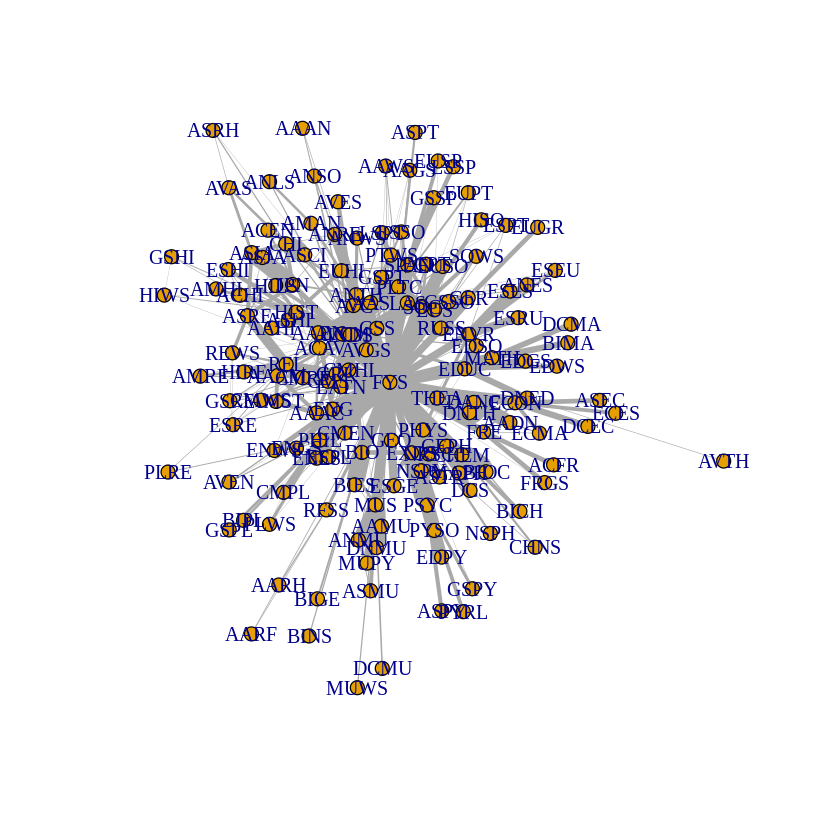

In [13]:
#This plot shows us all the potential departments and the visual connections of people between them where the 
# thicker the line is, the more overlap that occured.
# I decreased the vertex size by a third and the edge weight by 25% to better see the visualization
plot(course.g, layout=la, vertex.size=5, edge.width=e.wt * 0.25,vertex.label=V(course.g)$name)

In [ ]:
#########WARNING#######
####THIS KERNEL FOR SOME REASON HAS NOT BEEN ABLE TO RUN FOR ME, NO SYNTAX ERROR, IT JUST DOES NOT RUN####
####TAKES FOREVER TO RUN#####
#la2 produces all the vertices of all the potential faculty within this network
la2 <- layout.fruchterman.reingold(fac.g)

#e.wt2 produces all the edges connecting faculty who have a shared an academic department
e.wt2 <- get.edge.attribute(fac.g, "weight")

#This plot shows a visualization of the connections between faculty based off of the departments that they shared.
plot(fac.g, layout = la2, vertex.size = 3, edge.width=0.1, vertex.label =V(fac.g)$name)
####TAKES FOREVER TO RUN#####
####THIS KERNEL FOR SOME REASON HAS NOT BEEN ABLE TO RUN FOR ME, NO SYNTAX ERROR, IT JUST DOES NOT RUN####
#########WARNING#######

In [15]:
##Betweenness

#This line calculates the betweenness of each faculty member within our initial data set
btwn.fac <- betweenness(fac.g)

#This line assigns the corresponding name with its corresponding betweenness value
names(btwn.fac) <- V(fac.g)$name

#This line now rearrages the data in decreasing order of betweennees value
ind <- order(-btwn.fac)

#This line allow us to see the top ten highest faculty members with betweenness values 
btwn.fac[ind][1:10]

#The betweenness value is a value that allows us to see how often a faculty member can be used as a link or gateway 
#between other faculty members within the network

Dale Chapman           Gina Fatone          John Smedley 
             5274.169              3588.219              3255.293 
       George Perkins        Michael Murray Baltasar Fra-Molinero 
             2485.962              2269.968              1344.820 
        John Baughman             Julie Fox        Rebecca Corrie 
             1293.613              1278.395              1212.659 
             Raj Saha 
             1192.584

In [16]:
## Eigenvector 

#This line calculates the centrality of each faculty member within our initial data set
cent.eig <- evcent(fac.g)

#This line assigns the corresponding name with its corresponding centrality value
names(cent.eig$vector) <- V(fac.g)$name

#This line now rearrages the data in decreasing order of centrality value
ind <- order(-cent.eig$vector)

#This line allow us to see the top ten highest faculty members with centrality values 
cent.eig$vector[ind][1:10]

Alan Carr   Hiroya Miura    Gina Fatone    John Corrie   Dale Chapman 
    1.00000000     0.79422422     0.36598939     0.36591802     0.25624344 
Larry Williams    Seth Warner  Ben Hansberry Christy Thomas   Eric LaPerna 
    0.25613589     0.14330859     0.11478156     0.11477791     0.08616003

## Summary

By using the computational tools of R we were able to learn a bit more about how faculty and our academic deprtments are related. We were able to learn about which faculty shared deparments as well as which academic departments shared multiple faculty. Using the R visualization tools, we were then able to plot this network using tools like "layout_with_fr" and "edge_attr". At the end of this examination, we were able to see how many potential connections could have been potentially made using a betweenness analysis. This landed us at a very interesting observation of centrality which pointed all connection to Alan Carrr and he could have had connections with almost all the people within our dataset because of how many departments he has shared with other faculty members. This is very interesting becuase though he has the highest centrality value he was not top ten within the betweeness values. If given more time I would definetly take a more depth look into how this happend. 

### Cleaning Data?
One way that I attemped to clean the data in order to better imporve the visulization was rescaling all of the vertex sizes and and edge weights in order to make the plot easier to read and understand. This included the cutting the vertex sizes down to a third of its inital vaue and making the edge weights 25% of what they were initially.

## Different Information Using the Same Data: Course Department & Academic Term

In [17]:
#Stitch together the two columns that we want to work with, course departmant and the term in which it was taught 
term_course <- data.frame(classdata$TERM, classdata$CRSE)

In [18]:
#This line turns our data frame into a matrix so that it is easier to manipulate
term_course <- as.matrix(term_course)

In [19]:
#This code creates a list that shows us the term in which what class departments were taught in
term_course <- graph.edgelist(term_course, directed = TRUE)

In [20]:
term_course

IGRAPH 1901805 DN-- 154 2712 -- 
+ attr: name (v/c)
+ edges from 1901805 (vertex names):
 [1] fall->AAAC fall->AAAC fall->AAAC fall->AAEN fall->AAS  fall->AAS 
 [7] fall->ACEN fall->ACFR fall->ACHI fall->ACHI fall->ANRE fall->ANTH
[13] fall->ANTH fall->ANTH fall->ANTH fall->ANTH fall->ANTH fall->ANTH
[19] fall->ANTH fall->ASHI fall->ASIA fall->ASIA fall->ASJA fall->ASRE
[25] fall->AVAS fall->AVAS fall->AVC  fall->AVC  fall->AVC  fall->AVC 
[31] fall->AVC  fall->AVC  fall->AVC  fall->AVC  fall->AVC  fall->AVC 
[37] fall->AVC  fall->AVC  fall->AVC  fall->AVC  fall->AVC  fall->AVC 
[43] fall->AVCM fall->AVTH fall->BIES fall->BIMA fall->BIO  fall->BIO 
+ ... omitted several edges

In [21]:
#This seperates the connections and labels each type by telling you which ones are departments(T) and which are terms(F)
V(term_course)$type <- bipartite_mapping(term_course)$type

In [22]:
#This line creates a incidence that shows how many times a specific department was taught in each term
bipart_data2 <- get.incidence(term_course)

In [23]:
head(bipart_data2)

,AAAC,AAEN,AAS,ACEN,ACFR,ACHI,ANRE,ANTH,ASHI,ASIA,⋯,LSSP,RFSS,AVES,ECES,HISO,AARF,AMRE,ASMU,BIPL,PYRL
fall,5,6,6,1,1,4,3,23,5,7,⋯,1,8,0,0,0,0,0,0,0,0
short_term,2,1,0,0,0,0,0,11,3,0,⋯,0,2,1,1,1,0,0,0,0,0
winter,3,5,4,0,0,2,1,19,2,4,⋯,0,6,0,0,0,1,1,1,1,1


In [24]:
#This kernel creates the sociomatrix of each category telling us where departmenst overlapped in terms and where terms
#overlapped with departments
term.net <- bipart_data2 %*% t(bipart_data2)
course.net <- t(bipart_data2) %*% bipart_data2

#We cancel out the diagonal because it is impossible/redundant for a department to be in a term with itself or
# a term to share a department with itself
diag(term.net) <- NA
diag(fac.net) <- NA

In [25]:
#Course.g shows users all the relationships between departments taught within the same term, each line has 2 departments 
#shared by a term
course.g <- graph.adjacency(course.net, mode = "undirected", weighted=NULL, diag=FALSE)

#Term.g shows users all the terms that had departmens that were taught within other terms each line has 
#2 terms that were shared by a department
term.g <- graph.adjacency(term.net, weighted = TRUE, mode = "undirected", diag=FALSE)

#la produces vertices (All the possible departments) on the plane to show the potential location of each nodes
la <- layout_with_fr(term.g)

#E.wt provides us with the list of all the edge attributes, the number of edges and the weights
e.wt <- edge_attr(term.g, "weight")

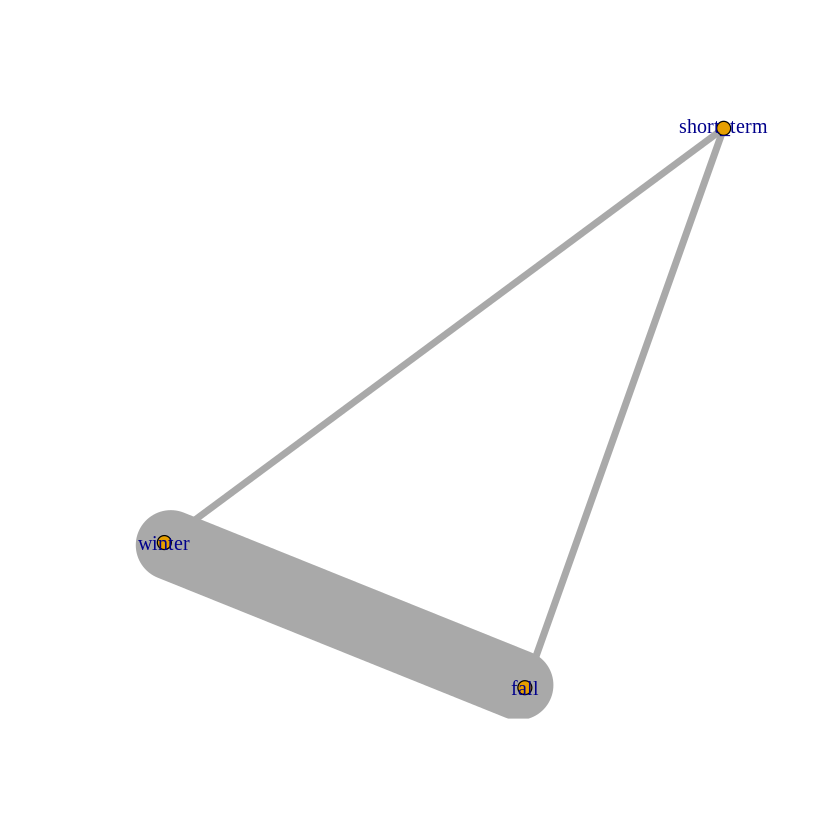

In [27]:
#This plot shows us all the potential terms and the visual connections between their academic departments 
#the thicker the line is,the more overlap that occured.
# I decreeased the vertex size by a third and the edge weight by 25% to better see the visualization
plot(term.g, col = "blue", layout=la, vertex.size=5, edge.width=e.wt * 0.001,vertex.label=V(term.g)$name)

There is a obvious but huge overlap between academic departments taught within the winter and fall term.

In [ ]:
#########WARNING#######
####THIS KERNEL FOR SOME REASON HAS NOT BEEN ABLE TO RUN FOR ME, NO SYNTAX ERROR, IT JUST DOES NOT RUN####
####TAKES FOREVER TO RUN######la2 produces all the vertices of all the potential departments within this network
la3 <- layout.fruchterman.reingold(course.g)

#e.wt2 produces all the edges connecting departments who have a shared term
e.wt3 <- get.edge.attribute(course.g, "weight")

#This plot shows a visualization of the connections between departments based off of the terms that they shared.
plot(course.g, layout = la3, vertex.size = 3, edge.width=0.1, vertex.label =V(course.g)$name)
####TAKES FOREVER TO RUN#####
####THIS KERNEL FOR SOME REASON HAS NOT BEEN ABLE TO RUN FOR ME, NO SYNTAX ERROR, IT JUST DOES NOT RUN####
#########WARNING#######

In [28]:
##Betweenness

#This line calculates the betweenness of each department within our initial data set
btwn.course <- betweenness(course.g)

#This line assigns the corresponding department with its corresponding betweenness value
names(btwn.course) <- V(course.g)$name

#This line now rearrages the data in decreasing order of betweennees value
ind <- order(-btwn.course)

#This line allow us to see the top ten highest departments with betweenness values 
btwn.course[ind][1:10]

#The betweenness value is a value that allows us to see how often a department can be used as a link or gateway between other
# departments within the network

MUS       AVC       BIO      ECON      MATH      PLTC      PSYC      PHYS 
313.11148 141.04659  78.75365  60.30139  58.90201  58.11496  55.99868  37.30878 
     ANTH      INDS 
 37.00906  33.91293

In [29]:
## Eigenvector 

#This line calculates the centrality of each department within our initial data set
cent.eig <- evcent(course.g)

#This line assigns the corresponding department with its corresponding centrality value
names(cent.eig$vector) <- V(course.g)$name

#This line now rearrages the data in decreasing order of centrality value
ind <- order(-cent.eig$vector)

#This line allow us to see the top ten highest departments with centrality values 
cent.eig$vector[ind][1:10]

MUS       FYS      ECON      MATH       AVC      PLTC      PSYC       ENG 
1.0000000 0.6100077 0.5324136 0.4836084 0.4742879 0.4380974 0.4240151 0.3984370 
      BIO      PHYS 
0.3413455 0.3187547

## Summary

By using the computational tools of R we were able to learn a bit more about how our semester terms and our academic deprtments are related. We were able to learn about which terms shared deparments as well as which departments were frequently taught in multiple terms. At the end of this examination we were able to see how many potential connections could have been potentially made using a betweenness analysis. This landed us at a very interesting observation of centrality which pointed all connection to Music being the class being the department that had the most frequency in each term and overlapped with the most other departments.